# Visualizing driver results - Single Camera

In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [67]:
BASE_DIR = '/home/romilb/research/msr/results/system_impl/singlecity_5e_360rt_newhp/'

In [68]:
inference_columns = ["timestamp", "task_id", "chunk_id", "test_acc"]
schedulers = next(os.walk(BASE_DIR))[1]
cities = next(os.walk(os.path.join(BASE_DIR, schedulers[1])))[1]

In [69]:
data = {}
#cities=["zurich"]
for scheduler in schedulers:
    data[scheduler] = {}
    for city in cities:
        inference_csv_path = os.path.join(BASE_DIR, scheduler, city, "inference_0.csv")
        fair_inference_df = pd.read_csv(inference_csv_path, names=inference_columns)
        fair_inference_df['t'] = fair_inference_df["timestamp"] - fair_inference_df["timestamp"].min()
        data[scheduler][city] = fair_inference_df

In [61]:
# Compare mean accuracies
for city in cities:
    fair_acc = data["fair"][city]["test_acc"].mean()
    noretrain_acc = data["noretrain"][city]["test_acc"].mean()
    print("{} Fair acc: {:.2f}. Noretrain acc: {:.2f}".format(city, fair_acc, noretrain_acc))

KeyError: 'fair'

In [70]:
print(len(cities))

5


noretrain: 0.61
fair_0: 0.6525
fair_11: 0.46875
fair_10: 0.61
best_acc: 0.6525, no_retrain_acc: 0.61, sched: fair_0
noretrain: 0.73125
fair_0: 0.728125
fair_11: 0.71375
fair_10: 0.72375
best_acc: 0.73125, no_retrain_acc: 0.73125, sched: noretrain
noretrain: 0.6357142857142855
fair_0: 0.6128571428571425
fair_11: 0.6071428571428571
fair_10: 0.5985714285714283
best_acc: 0.6357142857142855, no_retrain_acc: 0.6357142857142855, sched: noretrain
noretrain: 0.8305882352941175
fair_0: 0.8358823529411765
fair_11: 0.8364705882352941
fair_10: 0.8270588235294117
best_acc: 0.8364705882352941, no_retrain_acc: 0.8305882352941175, sched: fair_11
noretrain: 0.7533333333333334
fair_0: 0.7639999999999998
fair_11: 0.672
fair_10: 0.7879999999999998
best_acc: 0.7879999999999998, no_retrain_acc: 0.7533333333333334, sched: fair_10


<Figure size 432x288 with 0 Axes>

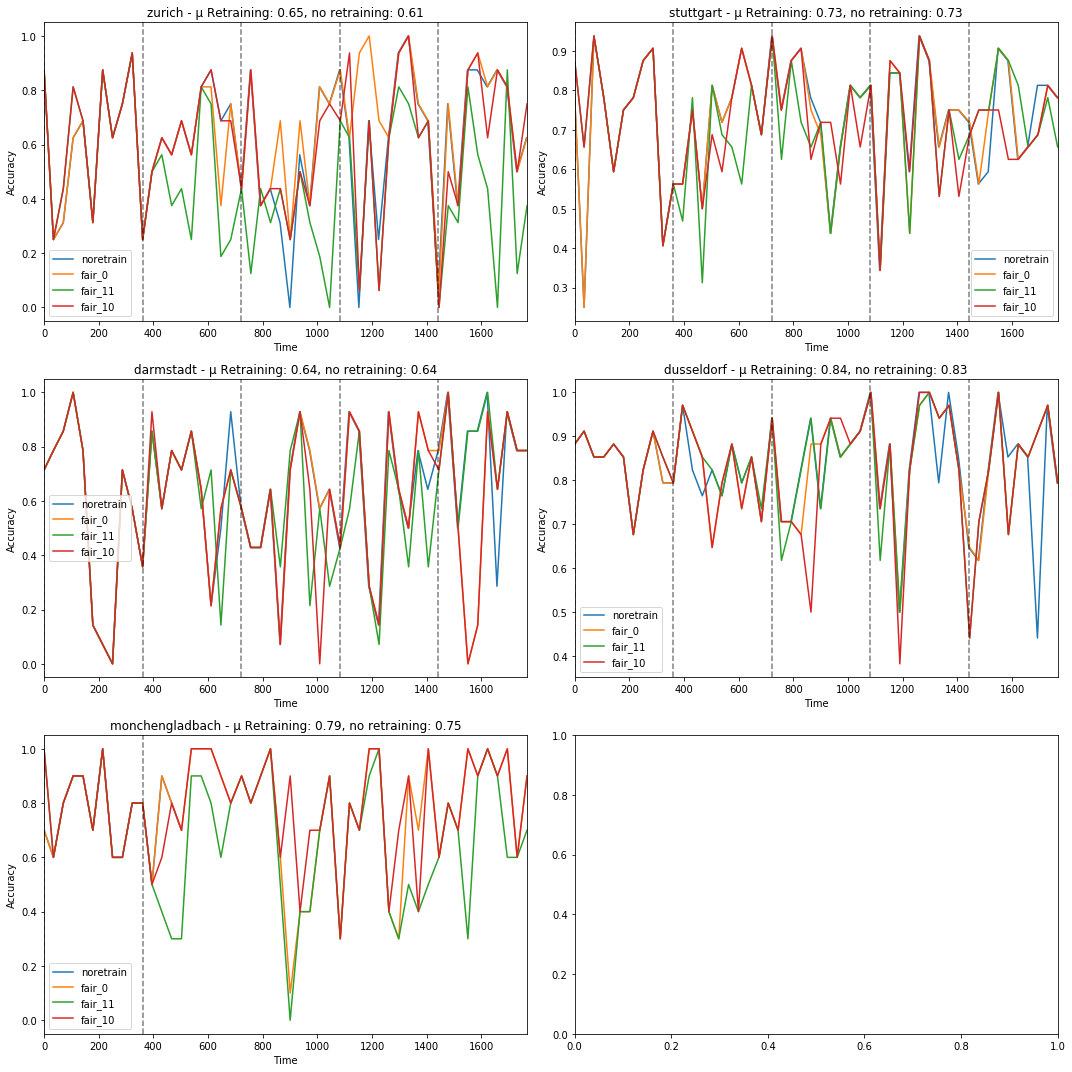

In [73]:
plt.figure()
NO_RETRAIN = "noretrain"
fig, axs = plt.subplots(figsize=[15,15], nrows=3, ncols=2)
axs_list = axs.reshape(-1)
for i, city in enumerate(cities):
    ax = axs_list[i]
    best_mean_acc = 0
    best_sched = ''
    for scheduler in schedulers:
        data[scheduler][city].plot(x="t", y="test_acc", ax=ax, label=scheduler)
        print("{}: {}".format(scheduler,data[scheduler][city]["test_acc"].mean()))
        mean_acc = data[scheduler][city]["test_acc"].mean()
        if mean_acc > best_mean_acc:
            best_mean_acc = mean_acc
            best_sched = scheduler
    temp_df = data[NO_RETRAIN][city]
    no_retrain_acc = temp_df["test_acc"].mean()
    print("best_acc: {}, no_retrain_acc: {}, sched: {}".format(best_mean_acc, no_retrain_acc, best_sched))
    
#     data[best_sched][city].plot(x="t", y="test_acc", ax=ax, label=best_sched)
#     data[NO_RETRAIN][city].plot(x="t", y="test_acc", ax=ax, label="noretrain")
    window_points = temp_df[temp_df["chunk_id"]==0]["t"]
    for pt in window_points:
        ax.axvline(x=pt, color='black', alpha=0.5, ls='--')
    ax.set_title("{} - μ Retraining: {:.2f}, no retraining: {:.2f}".format(city, best_mean_acc, no_retrain_acc))
    ax.set_xlabel("Time")
    ax.set_ylabel("Accuracy")
plt.tight_layout()
#plt.savefig('hp_sweep_best.pdf')

best_acc: 0.63, no_retrain_acc: 0.61, sched: fair_2
best_acc: 0.7475, no_retrain_acc: 0.73125, sched: fair_3
best_acc: 0.6699999999999997, no_retrain_acc: 0.6357142857142855, sched: fair_7
best_acc: 0.84, no_retrain_acc: 0.8305882352941175, sched: fair_0
best_acc: 0.8059999999999996, no_retrain_acc: 0.7699999999999997, sched: fair_1
best_acc: 0.7675862068965518, no_retrain_acc: 0.7558620689655173, sched: fair_6
best_acc: 0.7066666666666669, no_retrain_acc: 0.674666666666667, sched: fair_9
best_acc: 0.9219999999999997, no_retrain_acc: 0.9019999999999997, sched: fair_3
best_acc: 0.7819512195121952, no_retrain_acc: 0.7717073170731708, sched: fair_0
best_acc: 0.68375, no_retrain_acc: 0.6575, sched: fair_6
best_acc: 0.7436363636363637, no_retrain_acc: 0.7345454545454547, sched: fair_1
best_acc: 0.6453333333333334, no_retrain_acc: 0.6160000000000001, sched: fair_6


<Figure size 432x288 with 0 Axes>

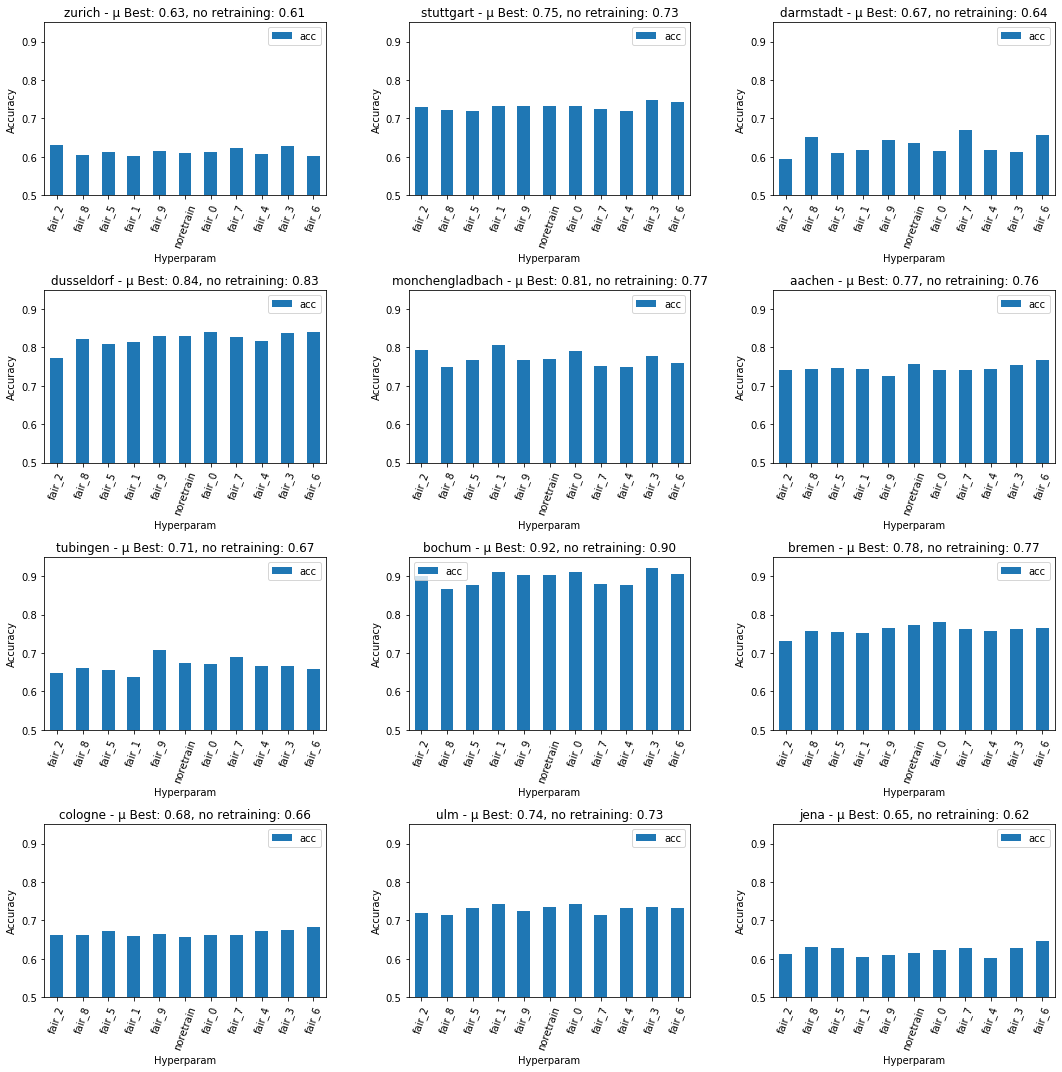

In [48]:
plt.figure()
fig, axs = plt.subplots(figsize=[15,15], nrows=4, ncols=3)
axs_list = axs.reshape(-1)
for i, city in enumerate(cities):
    ax = axs_list[i]
    mean_accs = []
    sched_names = []
    best_mean_acc = 0
    best_sched = ''
    for scheduler in schedulers:
        mean_acc = data[scheduler][city]["test_acc"].mean()
        sched_names.append(scheduler)
        mean_accs.append(mean_acc)
        if mean_acc > best_mean_acc:
            best_mean_acc = mean_acc
            best_sched = scheduler
    df = pd.DataFrame({'scheduler':sched_names, 'acc': mean_accs})
    temp_df = data["noretrain"][city]
    no_retrain_acc = temp_df["test_acc"].mean()
    print("best_acc: {}, no_retrain_acc: {}, sched: {}".format(best_mean_acc, no_retrain_acc, best_sched))
    
    df.plot.bar(x='scheduler', y='acc', rot=70, ax=ax)
    ax.set_title("{} - μ Best: {:.2f}, no retraining: {:.2f}".format(city, best_mean_acc, no_retrain_acc))
    ax.set_xlabel("Hyperparam")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(bottom=0.5, top=0.95)
plt.tight_layout()
#plt.savefig('hp_sweep_comparehparams.pdf')